> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (TMDB)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines.
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [4]:
df.shape

(10866, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
df.isnull().sum().sum()

13434

In [8]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

As noticed above:

1- there are rows contains severals values which are separated by(|),as: 'cast','director','keywords','genres', 'production_companies'.

2-there are columns which not needed in analysis as:'imdb_id', 'cast' , 'homepage' ,'tagline','keywords','overview','budget_adj','revenue_adj'. 

3- also,there are many columns which contains(0) values as:'budget', 'revenue','budget_adj','revenue_adj','runtime'.

4-'release_date', are object will be convert to datetime datatype.


In [9]:
### drop column which not needed in analysis
df.drop(['imdb_id', 'cast' , 'homepage' ,'tagline','keywords','overview','budget_adj','revenue_adj'],axis=1,inplace=True)
df.head(1)

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015


In [10]:
### convert 'release_date' datatype
df['release_date']=pd.to_datetime(df['release_date'])

In [11]:
### check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
id                      10866 non-null int64
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null datetime64[ns]
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(6), object(4)
memory usage: 1.1+ MB


In [12]:
### Replace (0) values to (NAN)
df=df.replace(0,np.NAN)

In [13]:
### drop rows which have 0 values
df=df.dropna(axis=0)

In [14]:
### Check
df.isnull().sum().sum()

0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3808 entries, 0 to 10848
Data columns (total 13 columns):
id                      3808 non-null int64
popularity              3808 non-null float64
budget                  3808 non-null float64
revenue                 3808 non-null float64
original_title          3808 non-null object
director                3808 non-null object
runtime                 3808 non-null float64
genres                  3808 non-null object
production_companies    3808 non-null object
release_date            3808 non-null datetime64[ns]
vote_count              3808 non-null int64
vote_average            3808 non-null float64
release_year            3808 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(3), object(4)
memory usage: 416.5+ KB


In [16]:
### Check for duplicates
df.duplicated().sum()

1

In [17]:
### Drop duplicates 
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3807 entries, 0 to 10848
Data columns (total 13 columns):
id                      3807 non-null int64
popularity              3807 non-null float64
budget                  3807 non-null float64
revenue                 3807 non-null float64
original_title          3807 non-null object
director                3807 non-null object
runtime                 3807 non-null float64
genres                  3807 non-null object
production_companies    3807 non-null object
release_date            3807 non-null datetime64[ns]
vote_count              3807 non-null int64
vote_average            3807 non-null float64
release_year            3807 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(3), object(4)
memory usage: 416.4+ KB


In [19]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,3807.000000,3807.000000,3.807000e+03,3.807000e+03,3807.000000,3807.000000,3807.000000,3807.000000
mean,40031.108484,1.203220,3.758903e+07,1.089161e+08,109.350932,533.886787,6.170239,2001.230890
std,67569.158096,1.480385,4.231877e+07,1.772686e+08,19.845761,883.605159,0.792423,11.327031
min,5.000000,0.010335,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000
25%,5940.000000,0.470439,1.000000e+07,1.425795e+07,96.000000,74.000000,5.700000,1995.000000
50%,11257.000000,0.809646,2.500000e+07,4.620143e+07,106.000000,208.000000,6.200000,2004.000000
75%,38577.000000,1.386953,5.000000e+07,1.260554e+08,119.000000,584.000000,6.700000,2010.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000


In [20]:
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'director',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year'],
      dtype='object')

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Top geners that make more money )

In [27]:
### prepare data to question 1
df_top=df.copy()
df_top.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


In [52]:
df_top=df[df['revenue']>=1000000000].sort_values(by='revenue',ascending=False)
df_top.head(15)

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
1386,19995,9.432768,237000000.0,2.781506e+09,Avatar,James Cameron,162.0,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
5231,597,4.355219,200000000.0,1.845034e+09,Titanic,James Cameron,194.0,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,4654,7.3,1997
4361,24428,7.637767,220000000.0,1.519558e+09,The Avengers,Joss Whedon,143.0,Science Fiction|Action|Adventure,Marvel Studios,2012-04-25,8903,7.3,2012
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015
14,99861,5.944927,280000000.0,1.405036e+09,Avengers: Age of Ultron,Joss Whedon,141.0,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,2015-04-22,4304,7.4,2015
3374,12445,5.711315,125000000.0,1.327818e+09,Harry Potter and the Deathly Hallows: Part 2,David Yates,130.0,Adventure|Family|Fantasy,Warner Bros.|Heyday Films|Moving Picture Compa...,2011-07-07,3750,7.7,2011
5422,109445,6.112766,150000000.0,1.274219e+09,Frozen,Chris Buck|Jennifer Lee,102.0,Animation|Adventure|Family,Walt Disney Pictures|Walt Disney Animation Stu...,2013-11-27,3369,7.5,2013
5425,68721,4.946136,200000000.0,1.215440e+09,Iron Man 3,Shane Black,130.0,Action|Adventure|Science Fiction,Marvel Studios,2013-04-18,6882,6.9,2013


In [31]:
df_top['genres'].value_counts()

Drama                                              243
Comedy                                             230
Drama|Romance                                      106
Comedy|Romance                                     103
Comedy|Drama|Romance                                87
Comedy|Drama                                        85
Horror|Thriller                                     80
Horror                                              57
Drama|Thriller                                      47
Action|Thriller                                     39
Crime|Drama|Thriller                                37
Drama|Comedy                                        36
Comedy|Family                                       32
Action|Crime|Thriller                               31
Drama|Crime                                         27
Drama|History                                       27
Crime|Drama                                         26
Drama|Comedy|Romance                                25
Action|Cri

In [32]:
def separate_count(column):
    split_data = pd.Series(df[column].str.cat(sep = '|').split('|'))
    
    count_data = split_data.value_counts(ascending=False)
    return count_data

Text(0.5,1,'TOP GENRES')

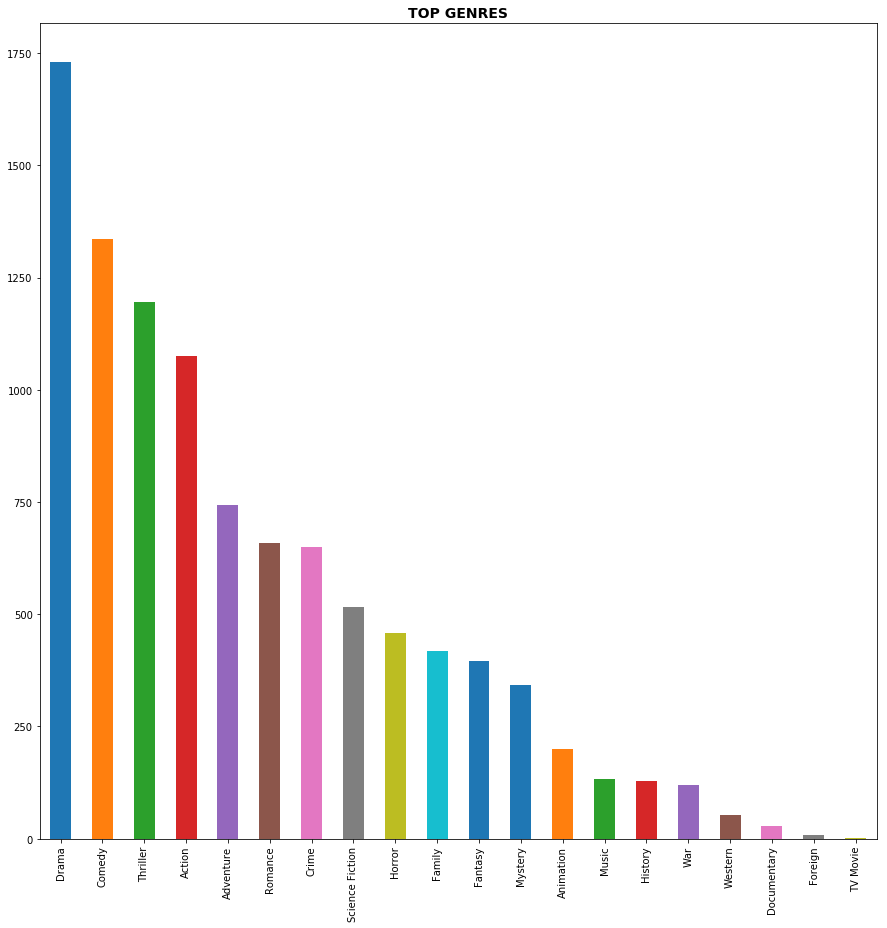

In [60]:
separate_count("genres").plot(kind="bar",figsize=(15,15))
plt.title("TOP GENRES",  fontsize = 14, weight = "bold")

Top Genres Movies are Drama Movies 

### Research Question 2  (Which Year had the highest no. of movies?)

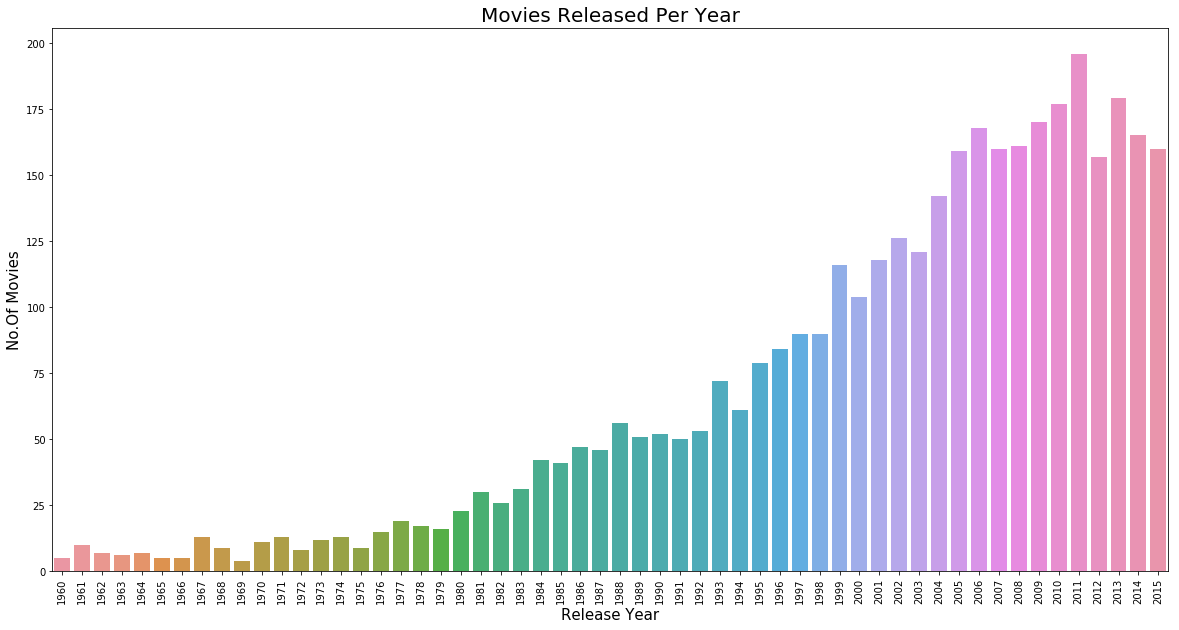

In [43]:
plt.figure(figsize=(20, 10))
sns.countplot(df_top['release_year'])
plt.title('Movies Released Per Year',fontsize=20)
plt.xlabel('Release Year',fontsize=15)
plt.ylabel('No.Of Movies',fontsize=15)
plt.xticks(rotation=90)
plt.show()

As Observed from above gragh , 2011 had the highest no. of movies released

### Research Question 3  (Which  movies with highest and lowest profit,and find top 10 profitable movies?)

In [55]:
df_top['profit']=df_top['revenue']-df_top['budget']

In [56]:
print(df_top.original_title[df_top['profit']==df_top['profit'].max()])

original_title
Avatar    Avatar
Name: original_title, dtype: object


In [57]:
print(df_top.original_title[df_top['profit']==df_top['profit'].min()])

original_title
The Warrior's Way    The Warrior's Way
Name: original_title, dtype: object


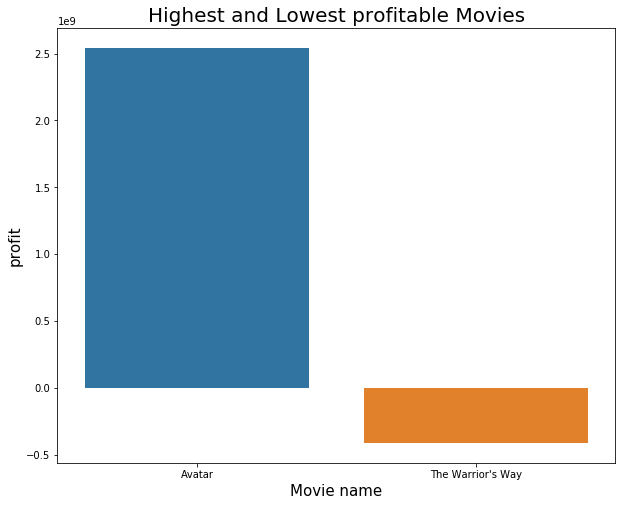

In [51]:
plt.figure(figsize=(10, 8))
dd=df_top[(df_top.profit==df_top['profit'].max())|(df_top.profit==df_top['profit'].min())]
sns.barplot(dd['original_title'],dd['profit'])
plt.title('Highest and Lowest profitable Movies',fontsize=20)
plt.xlabel('Movie name',fontsize=15)
plt.ylabel('profit',fontsize=15)
plt.show()

Avatar isthe top provitable movie

## Finding top 10 Profitable Movies

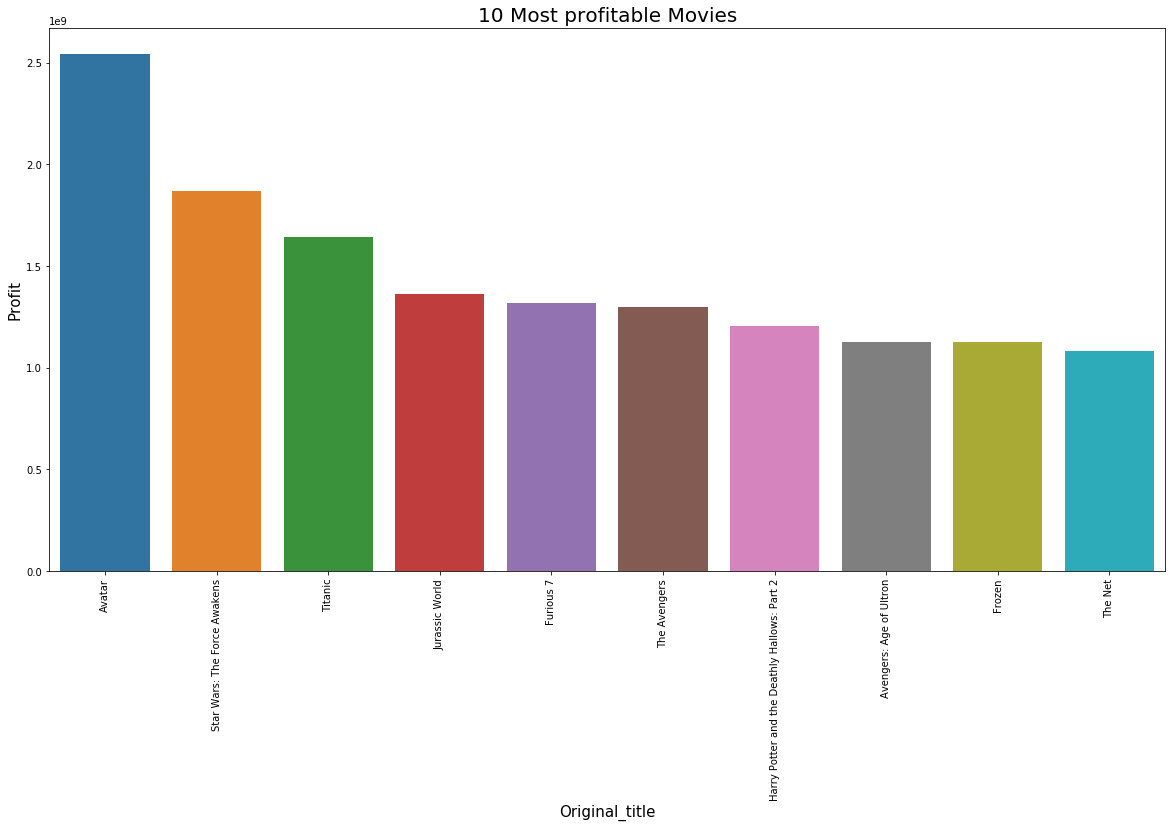

In [58]:
plt.figure(figsize=(20, 10))
ds=df_top[['original_title','profit']].sort_values('profit',ascending= False).head(10)
sns.barplot(x='original_title',y='profit',data=ds)
plt.title('10 Most profitable Movies',fontsize=20)
plt.xlabel('Original_title',fontsize=15)
plt.ylabel('Profit',fontsize=15)
plt.xticks(rotation=90)
plt.show()

<a id='conclusions'></a>
## Conclusions

> So The Coclusion is

>IF we want to create a movie which can give ahigh profit, it must be on of top 10 genres movies in making money(Drama,Comedy,Thriller,Action,Adventure,Romance,Crime,Science fiction,Horror,Family).

>As Observed,the most year had movies is 2011.released about 200 Movie.

>Avatar is the top profitable movie.

>The Warrior's Way is the lowest profitable movie.
## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [62]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0